In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis del dataframe

In [2]:
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


No haya ningun dato nulo.

### Descripción estadistica

In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Podemos ver que hay mucha diferencia entre el promedio de las columnas, por ejemplo si vemos el promedio de Nonflavanoid_Phenols en comparacion con el promedio de Proline vemos que hay una muy grande diferencia entre ellos, asi tambien con el resto de las columnas, por eso para que el algoritmo de clustering funcione hay que normalizar los valores.

Para eso vamos a utilizar MinMaxScaler de sklearn mas adelante.

### Visualización de la distribucion

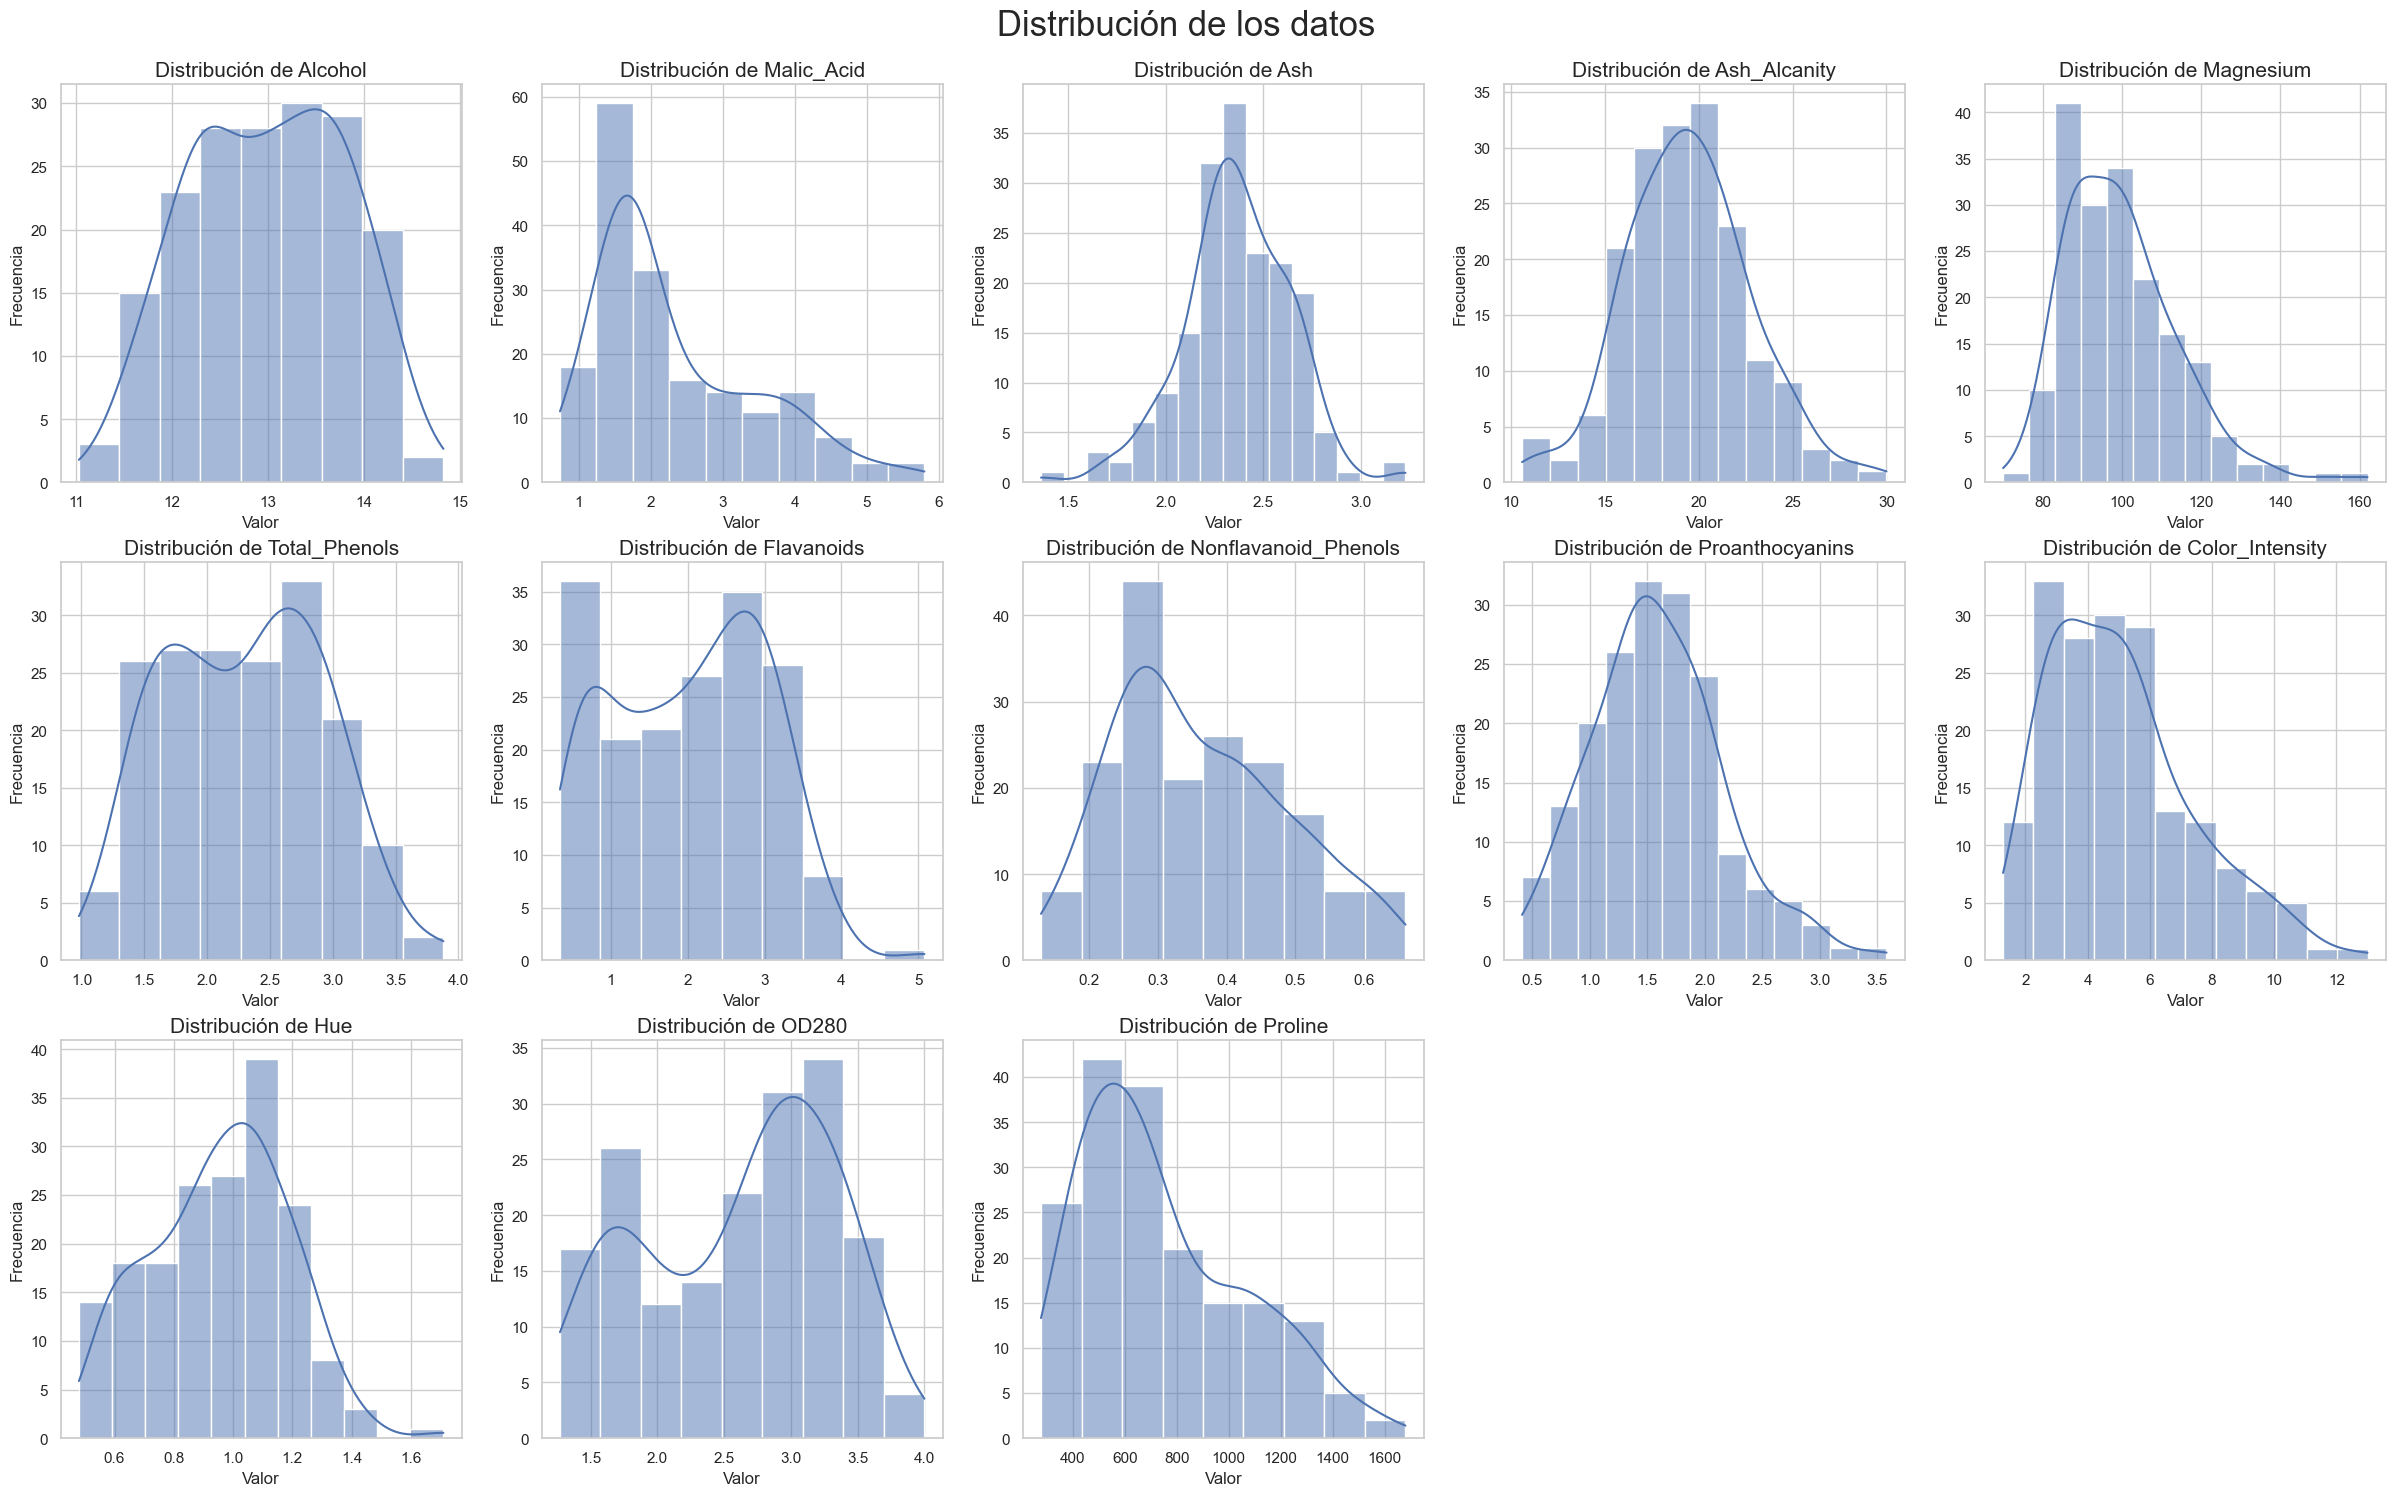

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de cada atributo
sns.set(style="whitegrid")
plt.figure(figsize=(30, 30))
cantidad = 1
for column in df.columns:
    plt.subplot(5,5,cantidad)
    sns.histplot(df[column], kde=True)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.title(f'Distribución de {column}', fontsize=15)
    cantidad+=1

plt.suptitle('Distribución de los datos', y=0.905, fontsize=25)
plt.show()

### Correlacion entre las variables

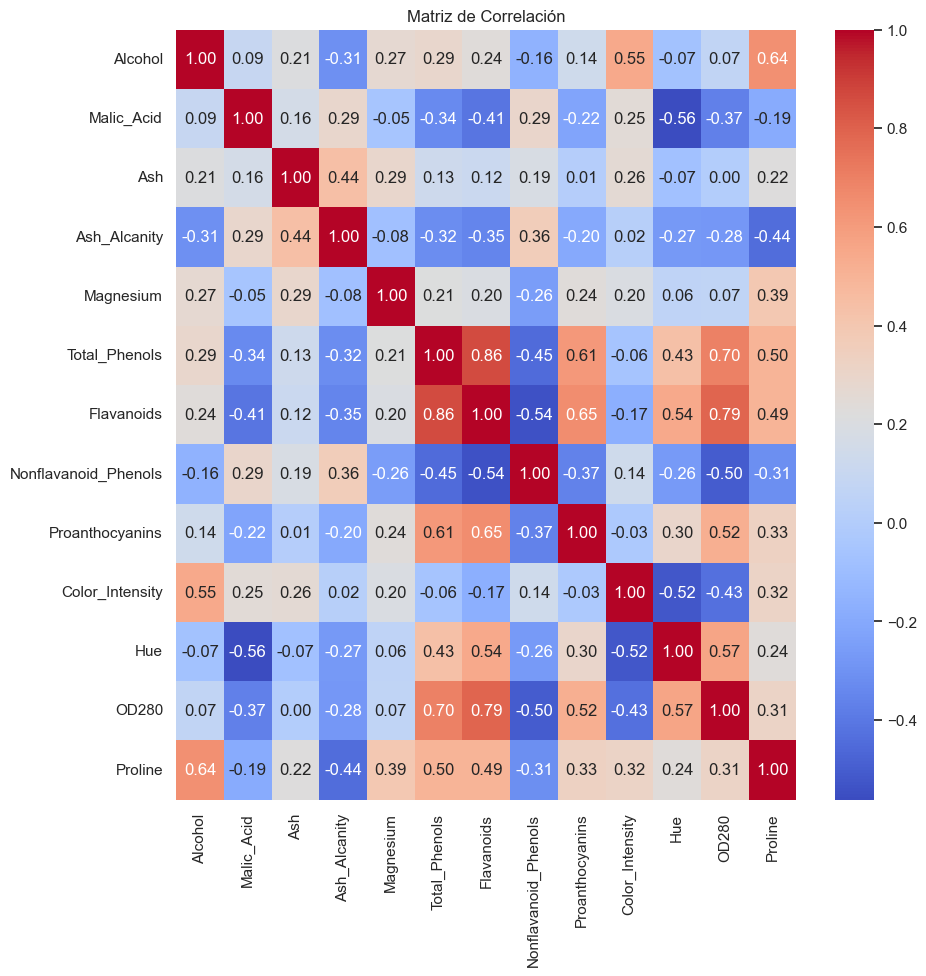

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que hay entre muy pocas variables altamente correlacionadas, eso nos indica que no hay redundancia entre las variables, ademas de que no hay una fuerte correlacion lineal, aunque hay unas pocas que tiene alta correlacion como Total_phenols, Flavanoids y OD280.

### Valores atipicos (Outliers)

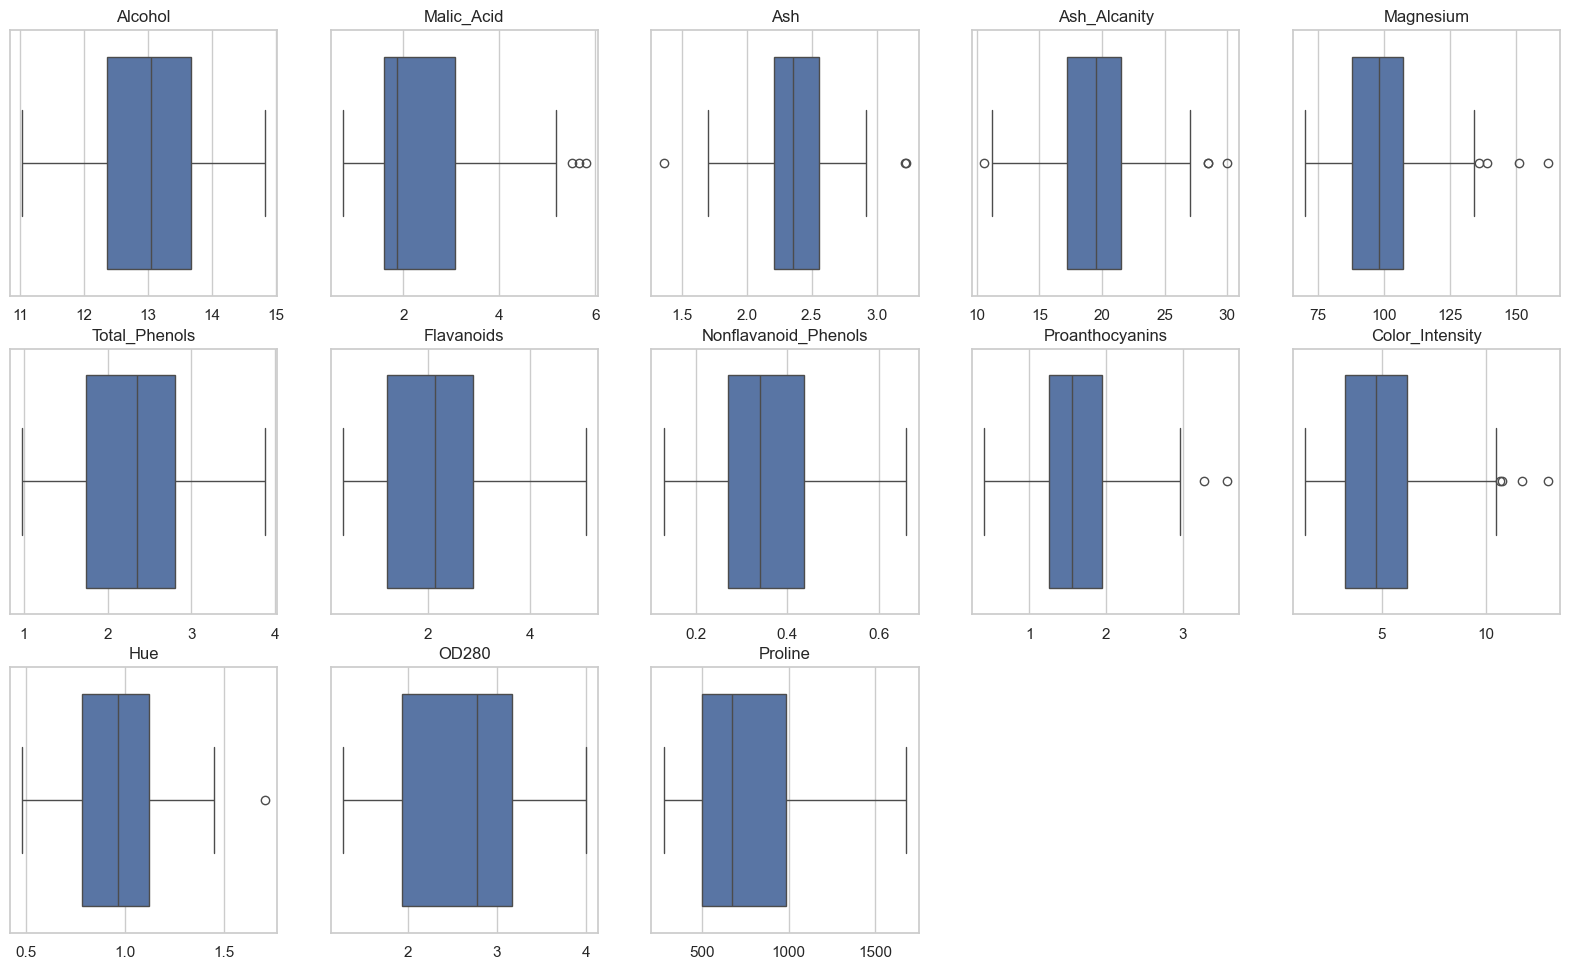

In [7]:
# Boxplots para identificar valores atípicos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
cantidad = 1
for column in df.columns:
    plt.subplot(5,5,cantidad)
    sns.boxplot(x=df[column])
    plt.xlabel('')
    plt.title(column)
    cantidad += 1
    
plt.show()

Vemos outiliers en algunos atributos, que no veo la necesidad de trabajarlos ya que en este caso los considero irrelevantes ya que son pocos los datos que tiene el df.